# Pymaceuticals Inc.
---

### Analysis

- A recent Pymaceuticals study on cancer treatments for squamous cell carcinoma was completed. Several drug regimens were tested on 248 mice and three drug treatments were reviewed against Capomulin: Ramicane, Infubinol and Ceftamin.

- Of these four treatments, Infubinol contained outliers and the treatments would need to be retested in order to confirm accuracy. Ceftamin appears to be the least effective, as the mice's final tumor size varies much more signifcantly than the other treatments. Two appear to successfully reduce SSC tumors: Capomulin and Ramicane. 

- Given the strong Pearson's correlation for Capomulin (0.84), it appears to be the most successful at reducing SSC tumors.

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
#from pathlib import Path

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_results = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
mouse_study_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [46]:
print(mouse_study_results.columns)

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')


In [47]:
# Checking the number of mice.
mouse_count = len(mouse_study_results["Mouse ID"].unique())
print(mouse_count)

249


In [48]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_mouse = mouse_study_results.loc[mouse_study_results.duplicated(subset = ["Timepoint", "Mouse ID"]), "Mouse ID"].unique()
dupe_mouse                                                                      

array(['g989'], dtype=object)

In [49]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mouse = mouse_study_results.loc[mouse_study_results.duplicated(subset = ["Timepoint", "Mouse ID"], keep = False), :]
dupe_mouse                                                                      

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [50]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_sanitized = mouse_study_results.loc[mouse_study_results["Mouse ID"] !="g989", :]
mouse_study_sanitized

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [51]:
# Checking the number of mice in the clean DataFrame.
mouse_count = len(mouse_study_sanitized["Mouse ID"].unique())
print(mouse_count)

248


In [52]:
mean_tumor = mouse_study_sanitized.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
print(mean_tumor)

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64


## Summary Statistics

In [53]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean_tumor = mouse_study_sanitized.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_tumor = mouse_study_sanitized.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_vol_var = mouse_study_sanitized.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_stddev = mouse_study_sanitized.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_sem = mouse_study_sanitized.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

mouse_results_df = pd.DataFrame({
   "Mean Tumor Volume": mean_tumor,
   "Median Tumor Volume": median_tumor,
   "Tumor Volume Variance": tumor_vol_var,
   "Tumor Volume Std Dev": tumor_stddev,
   "Tumor Volume Std Err": tumor_sem
})

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mouse_results_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [54]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
mouse_study_sanitized.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

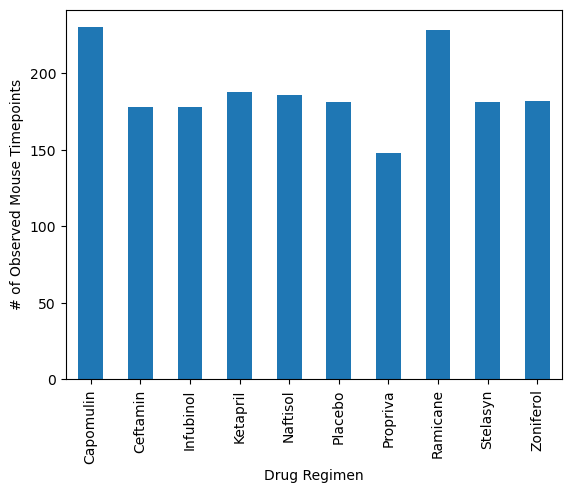

In [55]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_study_sanitized.groupby(["Drug Regimen"])["Mouse ID"].count().plot.bar();
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

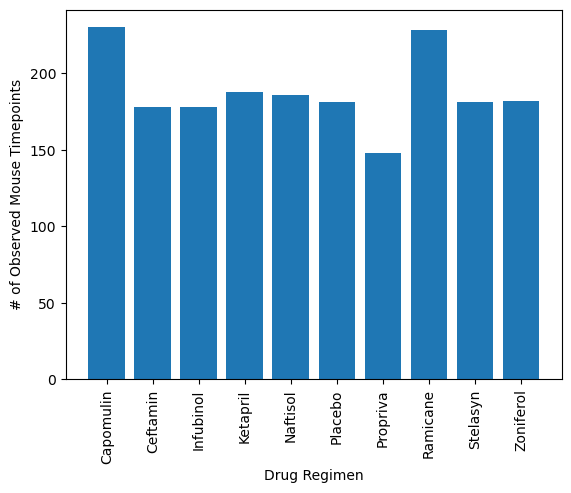

In [56]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
data = mouse_study_sanitized.groupby(["Drug Regimen"])["Mouse ID"].count()
plt.bar(data.index, data, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90);

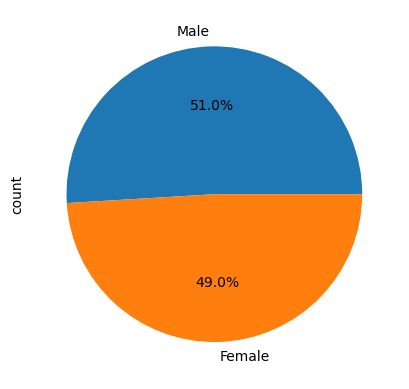

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#data = mouse_study_sanitized.groupby(["Sex"])["Sex"].count()
#autopct=("%1.1f%%")
#data.plot.pie();

FvsM = mouse_study_sanitized["Sex"].value_counts()
plt.figure()
fig=FvsM.plot(kind="pie", y=FvsM.index, autopct="%1.1f%%", labels=FvsM.index)


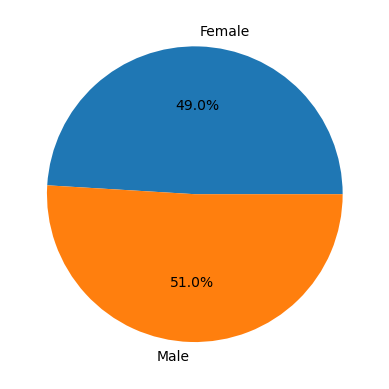

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
data = mouse_study_sanitized.groupby(["Sex"])["Sex"].count()
plt.pie(data, labels = data.index, autopct="%1.1f%%");

## Quartiles, Outliers and Boxplots

In [59]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_drugs = mouse_study_sanitized.loc[(mouse_study_sanitized["Drug Regimen"] == "Capomulin") |
                                        (mouse_study_sanitized["Drug Regimen"] == "Ramicane") |
                                        (mouse_study_sanitized["Drug Regimen"] == "Infubinol") |
                                        (mouse_study_sanitized["Drug Regimen"] == "Ceftamin"),
                                        ["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]                                      
                                        ]
                                        
four_drugs
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = four_drugs.groupby(["Drug Regimen", "Mouse ID"])["Timepoint"].max().reset_index()
last_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_vol = last_timepoint.merge(mouse_study_sanitized[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]],
                                   on = ["Mouse ID", "Timepoint"], how = "left")
tumor_vol

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
95,Ramicane,s508,45,30.276232
96,Ramicane,u196,45,40.667713
97,Ramicane,w678,5,43.166373
98,Ramicane,y449,15,44.183451


In [60]:
# Put treatments into a list for for loop (and later for plot labels)
mouse_outlier = mouse_study_results.groupby(["Mouse ID"]).max()
mouse_outlier_reset = mouse_outlier.reset_index()

# Merging this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_timepoint_merged_df = mouse_outlier_reset[["Mouse ID","Timepoint"]].\
    merge(tumor_vol,on =["Mouse ID","Timepoint"],how ="left")

# Putting treatments into a list for for loop (and later for plot labels)
def outliers(regimen):
    regimen_data = mouse_timepoint_merged_df.loc[mouse_timepoint_merged_df["Drug Regimen"] == regimen]["Tumor Volume (mm3)"]
    
    quartiles = regimen_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
# Determining outliers using upper and lower bounds
    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(f"{regimen}'s potential outliers:{outliers}")
    return regimen_data
    
capomulin = outliers("Capomulin")
ramicane = outliers("Ramicane")
infubinol = outliers("Infubinol")
ceftamin = outliers("Ceftamin")

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


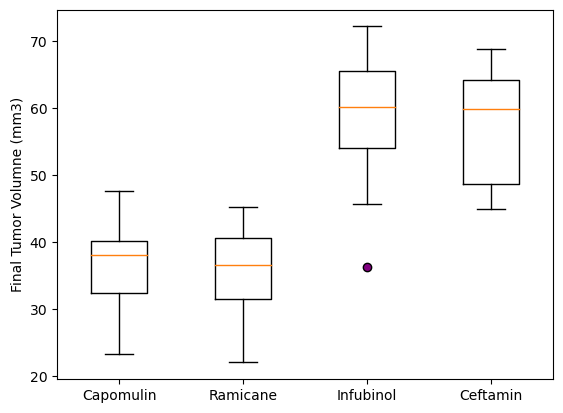

In [61]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volumne (mm3)")
ax1.boxplot([capomulin, ramicane, infubinol, ceftamin], labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], flierprops = dict(marker = "o", markerfacecolor = "purple"))

plt.show()

## Line and Scatter Plots

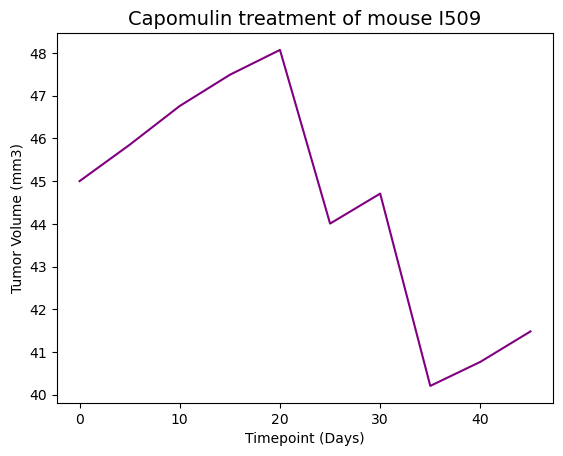

In [62]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capo_mouse_df = mouse_study_sanitized.loc[(mouse_study_sanitized["Drug Regimen"] == "Capomulin") & (mouse_study_sanitized["Mouse ID"] == "l509"), :]
                            
capo_mouse_df= capo_mouse_df[["Mouse ID","Tumor Volume (mm3)", "Timepoint" ]].reset_index(drop= True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.plot(capo_mouse_df["Timepoint"], capo_mouse_df["Tumor Volume (mm3)"], color="purple")
plt.title("Capomulin treatment of mouse I509", size = 14)
plt.xlabel("Timepoint (Days)", size = 10)
plt.ylabel("Tumor Volume (mm3)", size = 10)
plt.show()

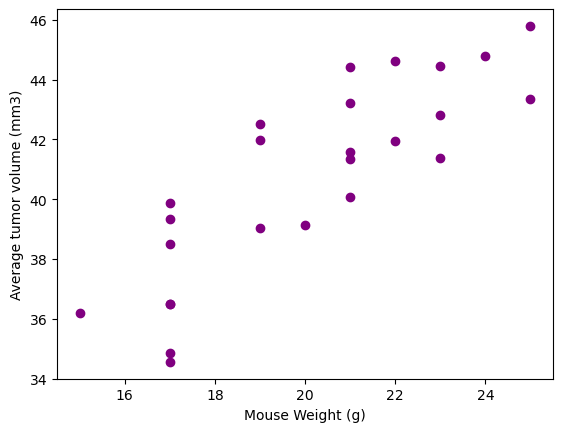

In [63]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_all_weight = mouse_study_sanitized.loc[(mouse_study_sanitized["Drug Regimen"] == "Capomulin") , :]
avg_mouse_weight = capomulin_all_weight.groupby(["Mouse ID"])[["Weight (g)","Tumor Volume (mm3)"]].mean()

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.scatter(avg_mouse_weight["Weight (g)"],avg_mouse_weight["Tumor Volume (mm3)"], color="purple")
plt.xlabel("Mouse Weight (g)", size =10)
plt.ylabel("Average tumor volume (mm3)", size =10)
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


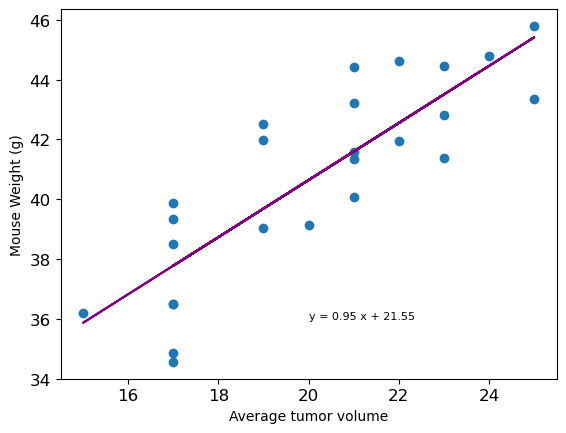

In [67]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(avg_mouse_weight["Weight (g)"],avg_mouse_weight["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope,intercept,rvalue,pvalue,stderr) = st.linregress(avg_mouse_weight["Weight (g)"],avg_mouse_weight["Tumor Volume (mm3)"])
regression=avg_mouse_weight["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.scatter(avg_mouse_weight["Weight (g)"],avg_mouse_weight["Tumor Volume (mm3)"])
plt.plot(avg_mouse_weight["Weight (g)"], regression, color="purple")
plt.annotate(line_eq,(20,36), fontsize=8)
plt.xlabel('Average tumor volume', size =10)
plt.ylabel('Mouse Weight (g)', size =10)
plt.show()